# Global Solution 1 - 2TIAR - Natural Language Processing

### Members:
* Rafael Monteiro - 88668
* Wellington Santos- 87743

## Sentiment Analysis of product reviews sold by Amazon

That Amazon is one of the biggest companies today, everyone already knows, but did you know that a sentiment analysis of the comments given by users on the marketplace is often used to improve products and services? And of course, as a technology company, this is not done manually. Machine learning algorithms are applied daily to perform these queries.

Knowing that, here you can find a small sample of Amazon's review database. The team's job is to develop a model to infer whether that review is good or bad.

The evaluation measures should be the team's choices, however, be aware that negative reviews have a great impact on the business. In this case, justify the choice of metric.

### NLTK
For this exercise we will be working with NLTK (Natural Language Toolkit) module for sentiment analysis. We chose this module because it's  a very powerful tool, It has a lot of pre-trained models and corpora which helps us to analyze things very easily. 

Bellow we install NLTK package and download all features for performing NLP work. We do this through the command nltk.download(). 

*Obs: If already have installed the package and already download its dependencies don't run the following two cells. In the bellow image you can see we already have the package and its dependencies downloaded*

![alt text](nltk-download.png "nltk.download() pop-up")


In [1]:
# !pip install nltk

In [2]:
# nltk.download()

### Module importation block

Here we imported modules for helping on text punctuation removal, data analysis and visualization, the nltk module and sklearn to use t's train_test_split  object.

In [1]:
# Text preprocessing
from string import punctuation

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data analysis
import pandas as pd

# Machine Learning
from sklearn.model_selection import train_test_split
from nltk.metrics import ConfusionMatrix
import nltk

### Dataset overview

In [2]:
df = pd.read_csv('./data/amazon_sentiment_analysis.csv') # Load Amazon product reviews


Here we get a glimpse of data ir organized on the dataset. We got two columns, one with raw text, reviews, adn another with the labels,  sentiment. Also there are only two labels to work with: bad or good.

In [38]:
print(df.head(10))

                                              review sentiment
0  Expensive Junk: This product consists of a pie...       bad
1  Toast too dark: Even on the lowest setting, th...       bad
2  Excellent imagery...dumbed down story: I enjoy...      good
3  Are we pretending everyone is married?: The au...       bad
4  Not worth your time: Might as well just use a ...       bad
5  Book reads like written for grade schoolers: I...       bad
6  Jeanne de Florette & Manon of the Springs: I s...       bad
7  Theater Projector Ceiling Mount: Would not fit...       bad
8  This import is sooooooooooo good: This is a gr...      good
9  Garbage: The handle broke clean off after TWO ...       bad


Here we we can see a bit more detailed information about the dataset. We got 559500 entries, which is a pretty nice size to work with and we got no missing values.

In [17]:
df.info()
print(f'\nMssing Values Count:')
print(f'{df.isnull().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559500 entries, 0 to 559499
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   review     559500 non-null  object
 1   sentiment  559500 non-null  object
dtypes: object(2)
memory usage: 8.5+ MB

Mssing Values Count:
review       0
sentiment    0
dtype: int64


### EDA - Exploratory Data Analysis

Here we don't want to make a deep analysis on the Amazon's products reviews data, but only provide an overview of how the data is balanced. That being said, we plotted the dependent variable distribution.

The data here is well balanced no need to think about any data augmentation  strategy .

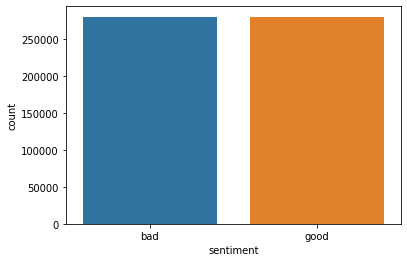

In [20]:
sns.countplot(x = df['sentiment'])
plt.show()

### Text Preprocessing

First we define a few functions for preprocessing the reviews. We define functions to remove punctuation, stopwords, apply stemming, to get all unique words on the data dataset and to get text features.

* We used a set of stopwords already provided by NLTK for the English language.
* The function that get all unique words on the dataset does so because we need to create a text feature matrix. This matrix allows us to check the frequency in which word occurs and analyze the frequency vs the labels.


In [21]:
stopwords = nltk.corpus.stopwords.words('english')  # Get stopwords

In [22]:
def removeStopwords(text):
    return  [word for word in text if word not in stopwords]

def removePunctuation(text):
    for p in punctuation:
        text = text.replace(p, '')
    return text

def applyStemming(text):
    return [nltk.PorterStemmer().stem(word) for word in text]

def getUniqueWordsFromDataset(reviews):
    document = []
    for review in reviews:
        textWithoutPunctuation = removePunctuation(review)
        wordList = textWithoutPunctuation.split(' ')
        textWithoutStopwords = removeStopwords(wordList)
        textWithStemming = applyStemming(textWithoutStopwords)
        document.extend(textWithStemming)
    return set(document)

The following cell gets all unique words for later use. It will create our word list of unique words.

In [24]:
uniqueWordList = getUniqueWordsFromDataset(df['review']) 

Right after we define a function to extract the text feature we need to train the model. Since we have all unique words on the dataset, the next steep is to verify the frequency in which them happen. So for each case that a word happens to be in the review we assign a True to it, otherwise we assign false.

The getTextFeatures() function should return  something similar to this:

```python
{'electricity.': False, 'stay': True, 'unplug': True, 'light': True, 'dark': True, 'toast': True, 'avoid': True, 'liking.': False, 'not': True, 'setting,': False, 'dark:': False, 'lowest': True, 'i': True, 'cuisinart.': False, 'wast': True, 'even': True, 'also,': False, 'expect': True, 'qualiti': True, 'lit': True}
```

In [ ]:
def getTextFeatures(text):
    features = {}vc
    textWithStemming = applyStemming(textWithoutStopwords)
    textWithoutDuplicatedWords = set(textWithStemming)
    for word in textWithoutDuplicatedWords:
        features['%s' % word] = (word in uniqueWordList)
    return features


Finally we should join the vectors of features (word occurrences) to their corresponding labels. Not only that, but we also need to format this that so we can work with it later on model training.

For that we'll format the entire data site, review by review, removing stopwords and punctuation, applying word stemming and turing each review into a vector of features.

In order of joining the vectors of features to its corresponding labels, we will be suing a NLTK function, apply_features(), which will extract each review's text features and match it with its corresponding label. The result will be the dataset for model training.

In [32]:
newDataset = []
for _, row in df.iterrows():
    rawText = row['review']
    textWithNoPunctuation = removePunctuation(rawText)
    wordList = textWithNoPunctuation.split(' ')
    newDataset.append((applyStemming(removeStopwords(wordList)), row['sentiment']))

newDataset = tuple(newDataset) # Convert dataset list to tupple
finalDataset = nltk.classify.apply_features(getTextFeatures, newDataset) # Format data for model training

### Train Test Split

The goal now is to split the data between training and test datasets. We are going to use 30% of the data for testing and 70% for training.

In [33]:
train, test = train_test_split(finalDataset, test_size=0.30, random_state=42)

### Model Training

For model training we chose a Naive Bayes based model already provided by NLTK. So it's quite easy to train the model on train data.

In [34]:
model = nltk.NaiveBayesClassifier.train(train)

### Inferences

Next we make a few inferences about how the model performed  on test data,  and analyze most informative features from naive bayes model perspective.

In [35]:
print(f'Labels:{model.labels()}\n') # Labels learned by the model
model.show_most_informative_features(n=10) # Features importance based on the model

Labels:['good', 'bad']

Most Informative Features
                 musthav = True             good : bad    =     39.7 : 1.0
                 mustbuy = True             good : bad    =     38.3 : 1.0
                     yuk = True              bad : good   =     37.8 : 1.0
                     drm = True              bad : good   =     37.6 : 1.0
                nonfunct = True              bad : good   =     35.8 : 1.0
                 unwatch = True              bad : good   =     33.8 : 1.0
               excrement = True              bad : good   =     32.4 : 1.0
                     rma = True              bad : good   =     31.0 : 1.0
               worthless = True              bad : good   =     29.0 : 1.0
               hodgepodg = True              bad : good   =     28.6 : 1.0


### Model test

Here only check the model's performance using accuracy as our metric.

In [36]:
print(f'Accuracy: {nltk.classify.accuracy(model, test)}')

Accuracy: 0.8236759011021746


### Evaluating results

next we build a confusion matrix to analyze how well th model performed.

In [37]:
expected = []
predicted = []
for (phrase, label) in test:
    result = model.classify(phrase)
    predicted.append(result)
    expected.append(label)

cm = ConfusionMatrix(expected, predicted)
print(cm)


     |           g |
     |     b     o |
     |     a     o |
     |     d     d |
-----+-------------+
 bad |<77650> 6319 |
good | 23277<60604>|
-----+-------------+
(row = reference; col = test)



### Conclusion 

The are several points to discuss here. First we did't want to go harder on NLP flow of machine learning. The idea was ot to build a ready-for-production model. Instead, the idea is to go through the NLP + NLTK text preprocessing, model training and test.

* That being said, we have to consider that the punctuation removal process isn't well effective, since it gets confused sometimes and causes some misunderstandings .

* The train test split wasn't well performed. Since we are not stratifying the split based on the dependent variable distribution, the results would vary a lot on tests. But the dataset is well balanced, so we got no issue on that.

* We chose Naive Bayes model cause we are working only to labels, and this kind of model tend to perform well o this scenarios. However, we got too many features on our vector, which me reduce model accuracy with Naive Bases models.

* We chose the accuracy as evaluation metric, but it proved not to be the best fit for evaluating this problem.  So we would not be able to deploy such this model for production without submitting it to other evaluation metrics. In such case, classifying a review negative as positive would hugely impact the business data analysis.


The are several approaches we could go through, butt we hose one very simple and used not reliable methods of text preprocessing, data training and tests, but the goal was to learn more and fell how NLP work flow would look like with NLTK package.